<a href="https://colab.research.google.com/github/Oluwabukunmige/My-Machine-Learning-Journey/blob/master/Machine_Learning_Algorithths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification Problem

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 6.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1LGnSqHpFC9wFKFXEpxBWw5fSIdckRt_8'})
download.GetContentFile('liver.csv')

In [0]:
import pandas as pd
liver = pd.read_csv('liver.csv')

In [0]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Preprocess the dataset

In [0]:
final_liver = liver.copy()
final_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
final_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


From the information from the Albumin_and_Globulin_Ratio column, we can see that there are 4 missing values. Missing values are not good for our model, we will fill the missing values using the median value of Albumin_and_Globulin_Ratio. Median was chosen because median values are most resistant to outliers



In [0]:
final_liver['Albumin_and_Globulin_Ratio'].fillna(final_liver['Albumin_and_Globulin_Ratio'].median(), inplace = True)

In [0]:
y = final_liver['Dataset']
X = final_liver.drop('Dataset', axis = 1)

In [0]:
#To gain more information from the Age column, we will have to bin it into different categories.
# We one hot encode the resulting column
label_names = ['Children_Teenagers','Youth','Adult','Senior']
cut_points = [0,17,29,59,90]

def process_age(X,cut_points, label_names):
    X['Age_categories'] = pd.cut(X['Age'],cut_points, labels = label_names)
    return X

X = process_age(X,cut_points,label_names)

In [0]:
X['Age_categories'].value_counts(dropna = False)

Adult                 345
Senior                133
Youth                  80
Children_Teenagers     25
Name: Age_categories, dtype: int64

In [0]:
cat_vars =['Gender','Age_categories']

for var in cat_vars:
  
  cat_list = pd.get_dummies(X[var], prefix=var)
  X1=X.join(cat_list)
  X=X1

cat_vars =['Gender','Age_categories']
data_vars = X.columns.values.tolist()

to_keep=[i for i in data_vars if i not in cat_vars]

In [0]:
X=X[to_keep]
X.columns.values

array(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Gender_Female', 'Gender_Male',
       'Age_categories_Children_Teenagers', 'Age_categories_Youth',
       'Age_categories_Adult', 'Age_categories_Senior'], dtype=object)

I will drop the age column as it does not add any variability to our data


In [0]:
X.drop('Age', axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
#Import all the needed prepreocessing modules and the logistic regression module
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


To prevent any form of data leakage, we have to split our data into the training and test set before carring out any form of preprocessing.

## Logistic Regression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [0]:
target_count = final_liver['Dataset'].value_counts(dropna = False)
target_count

1    416
2    167
Name: Dataset, dtype: int64

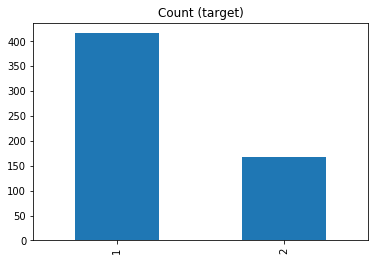

In [0]:
target_count.plot(kind='bar', title='Count (target)')

In [0]:
logistic = LogisticRegression()

In [0]:
pipe = make_pipeline(MinMaxScaler(),
                     PolynomialFeatures(),
                     LogisticRegression()
                    )



In [0]:
import numpy as np

parameters = {'logisticregression__C': np.linspace(1, 10, 10),
              'logisticregression__penalty':["l1","l2"],
              'polynomialfeatures__degree': [1, 2, 3]
             }

In [0]:
clf = GridSearchCV(pipe, parameters, cv=5, verbose=5, n_jobs=3)

In [0]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done 104 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 284 tasks      | elapsed:   13.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   13.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_in

In [0]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=7.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
clf.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=7.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.best_params_

{'logisticregression__C': 7.0,
 'logisticregression__penalty': 'l1',
 'polynomialfeatures__degree': 1}

In [0]:
clf.score(X_train,y_train)

0.7459954233409611

In [0]:
clf.score(X_test, y_test)

0.6986301369863014

## Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [0]:
clf_train = clf.predict(X_train)
clf_predicted = clf.predict(X_test)

In [0]:
#clf_predicted

In [0]:
confusion = confusion_matrix(y_test, clf_predicted)
confusion

array([[95,  5],
       [39,  7]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf_predicted, target_names=['liver_disease_absent', 'liver_disease_present']))

                       precision    recall  f1-score   support

 liver_disease_absent       0.71      0.95      0.81       100
liver_disease_present       0.58      0.15      0.24        46

             accuracy                           0.70       146
            macro avg       0.65      0.55      0.53       146
         weighted avg       0.67      0.70      0.63       146

